In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats

!pip install ipy_table
import ipy_table as tbl

import warnings
warnings.filterwarnings('ignore')

  Created wheel for ipy-table: filename=ipy_table-1.15.1-py3-none-any.whl size=18768 sha256=3ac8ca40ebcf7e4fda65765ef667b5aee998387b57f41f735e9d75e9b9925c9e
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\28\9a\6c\235ab11c6eda0ea6dc621383e3dbbf26671fa068420ad321dc
Successfully built ipy-table


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

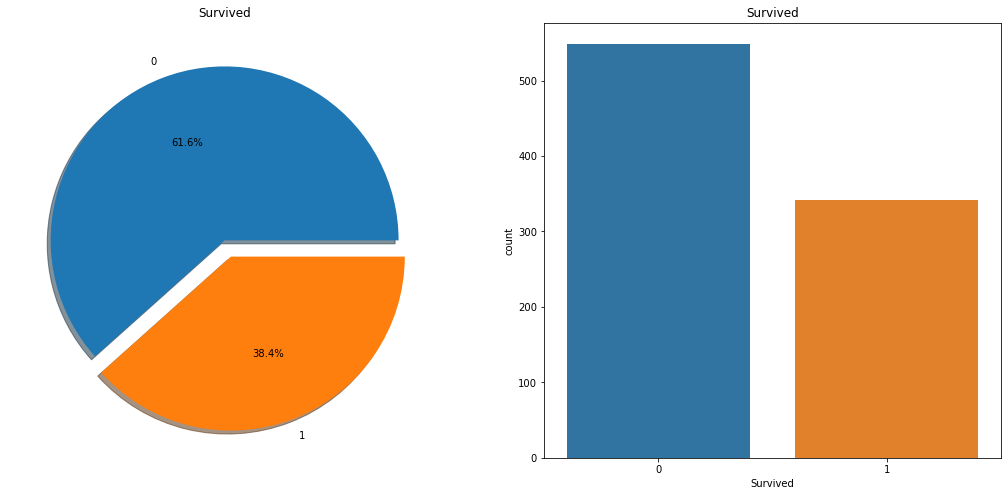

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train,ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_xlabel('Survived')
plt.show()

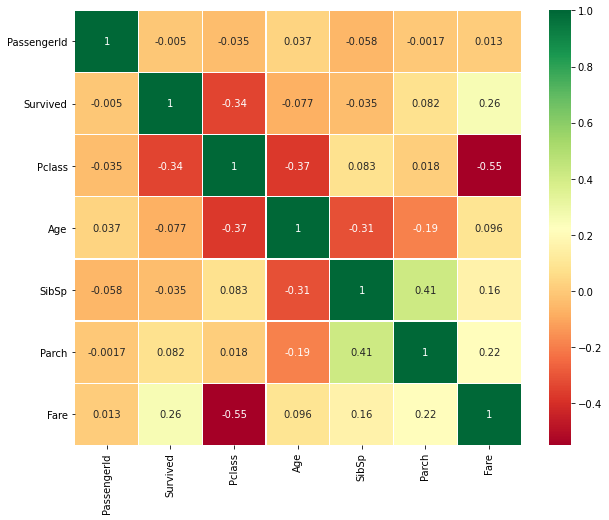

In [11]:
#Correlation Between The Features
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [13]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

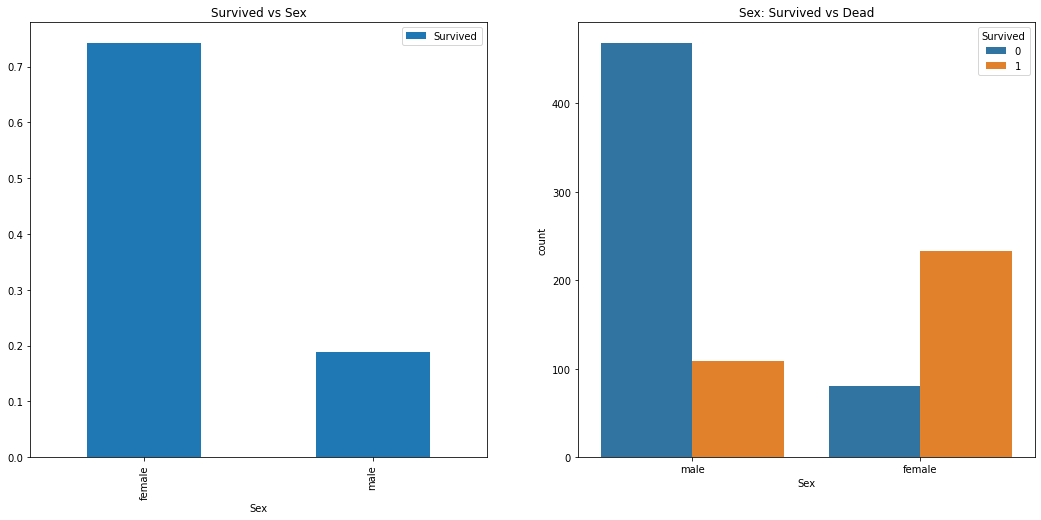

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [15]:
#pclass
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='YlGn')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


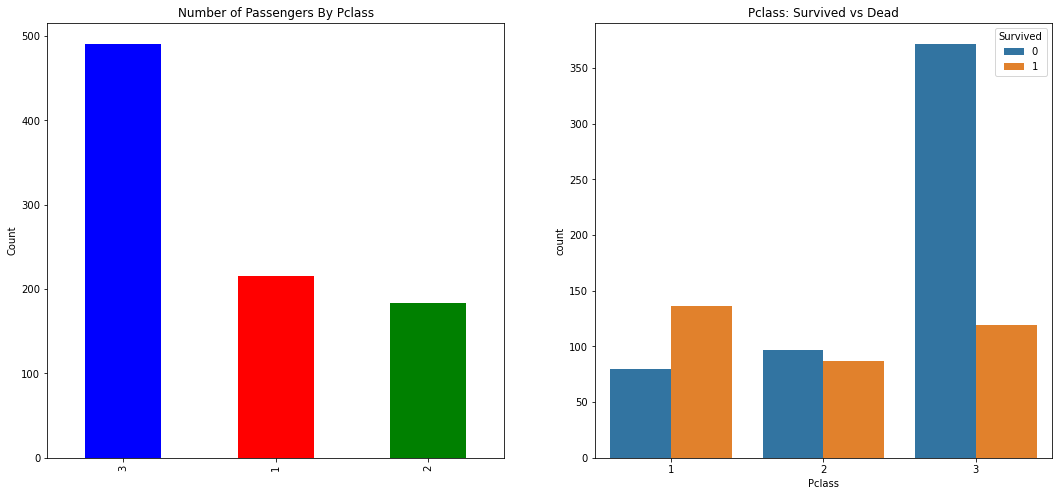

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['Blue','Red','Green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [18]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

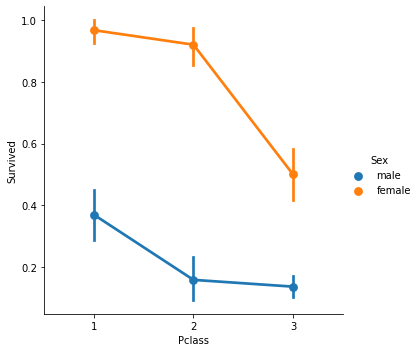

In [19]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In [20]:
print('Mean Age',df_train.Age.mean())
print('Max Age',df_train.Age.max())
print('Min Age',df_train.Age.min())

Mean Age 29.69911764705882
Max Age 80.0
Min Age 0.42


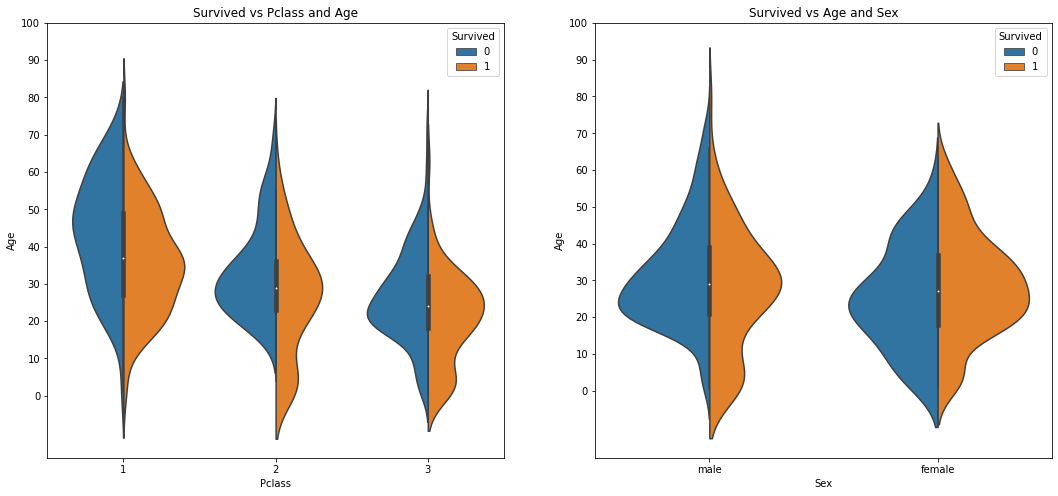

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',split=True,data=df_train,ax=ax[0])
ax[0].set_title('Survived vs Pclass and Age')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',split=True,data=df_train,ax=ax[1])
ax[1].set_title('Survived vs Age and Sex')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [23]:
df_train.Age.isna().sum()

177

In [24]:
df_train['Intial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [25]:
pd.crosstab(df_train.Sex,df_train.Intial).style.background_gradient(cmap='summer_r')

Intial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [26]:
df_train['Intial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [27]:
df_train.groupby('Intial')['Age'].mean()

Intial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [28]:
df_train.loc[(df_train.Age.isnull())&(df_train.Intial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Intial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Intial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Intial=='Miss'),'Age']=21
df_train.loc[(df_train.Age.isnull())&(df_train.Intial=='Other'),'Age']=46

In [29]:
df_train.Age.isnull().sum()

0

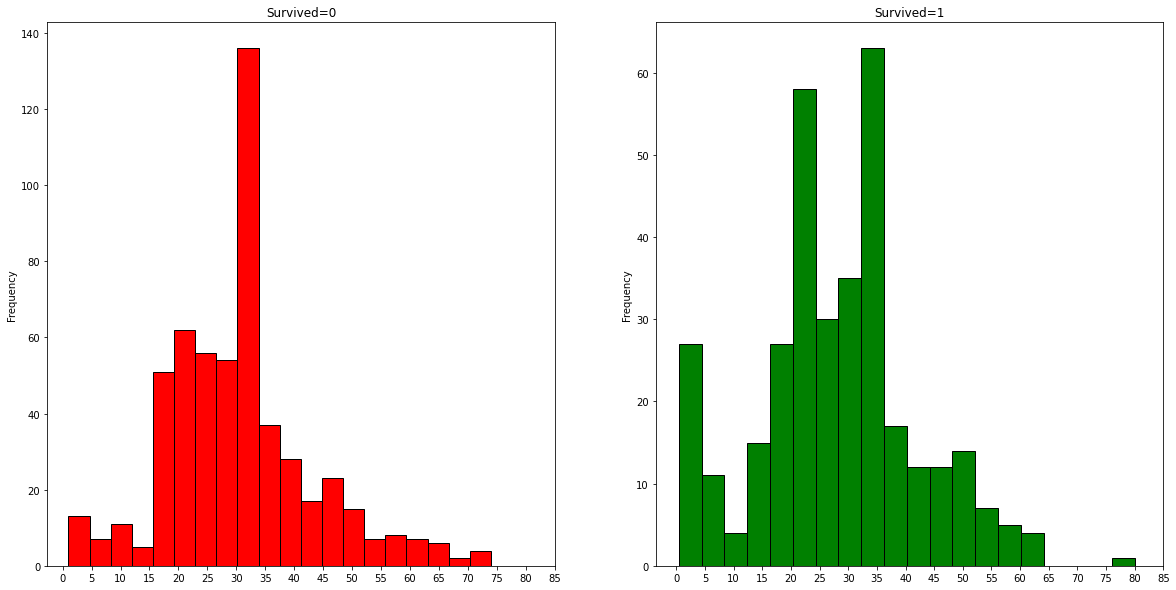

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
ax[0].set_xticks(range(0,90,5))
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(range(0,90,5));

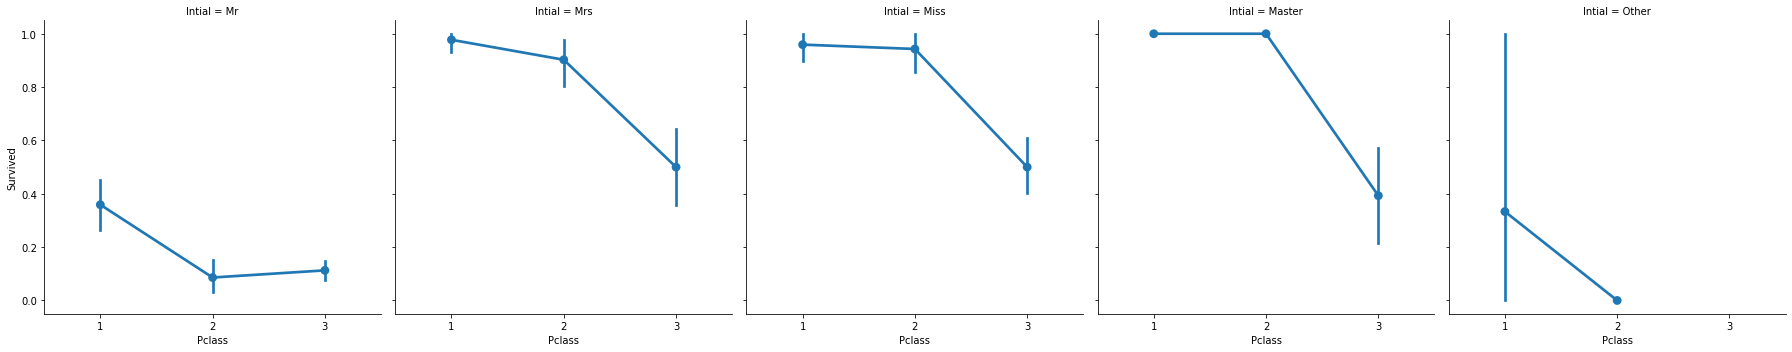

In [31]:
sns.factorplot('Pclass','Survived', col='Intial',data=df_train)
plt.show()

In [32]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

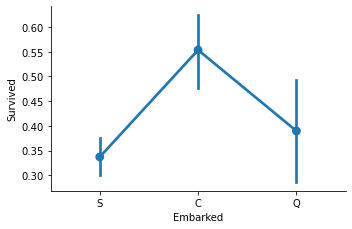

In [33]:
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

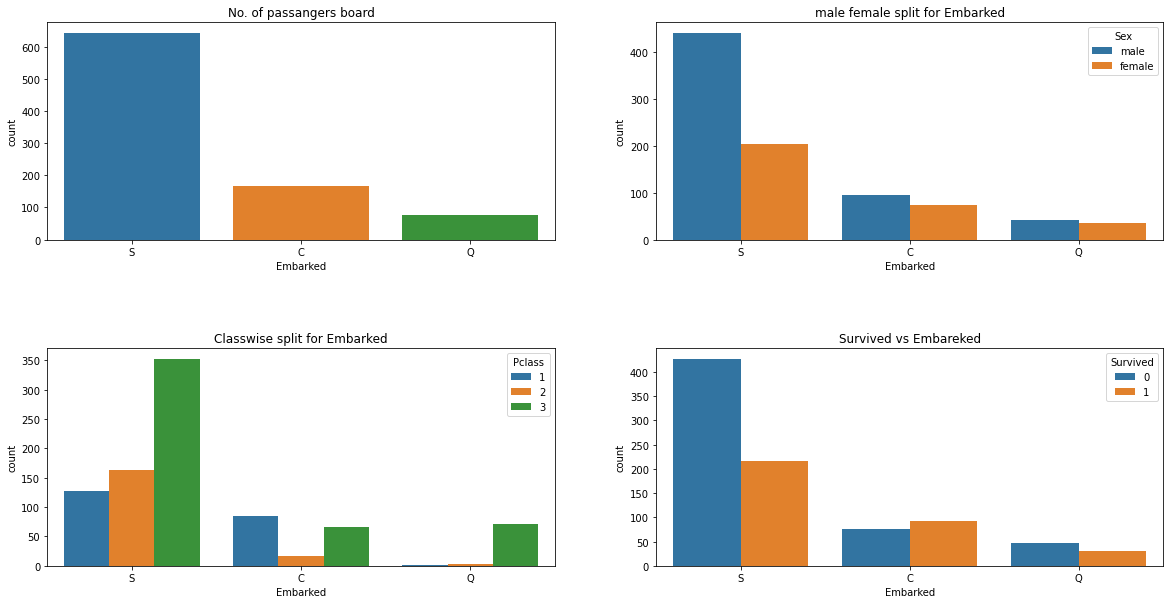

In [34]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. of passangers board')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('male female split for Embarked')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Classwise split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Survived vs Embareked')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

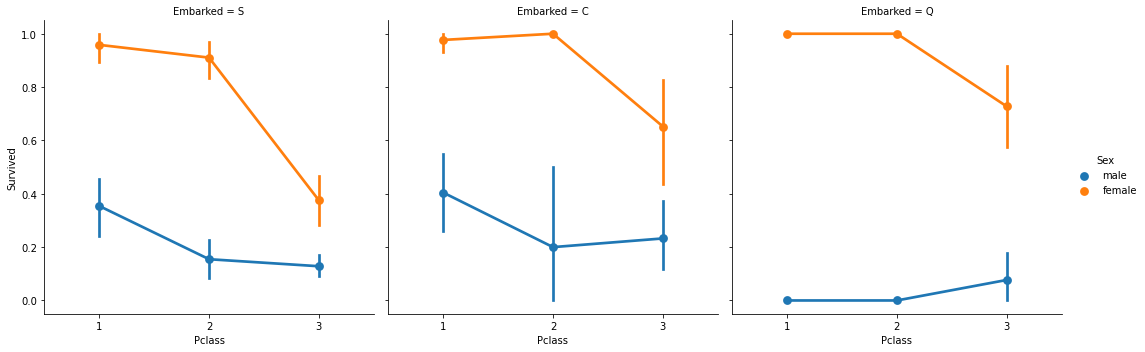

In [35]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show();

In [36]:
df_train.Embarked.isna().sum()

2

In [37]:
df_train.Embarked.fillna('S',inplace=True)

In [38]:
df_train.Embarked.isna().sum()

0

In [39]:
pd.crosstab(df_train.SibSp,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


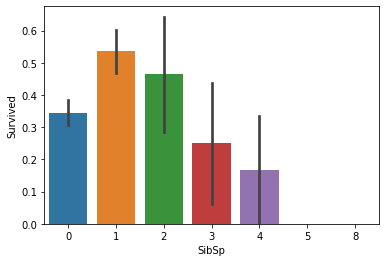

In [40]:
sns.barplot('SibSp','Survived',data=df_train)
plt.show()

In [41]:
pd.crosstab(df_train.SibSp,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [42]:
pd.crosstab(df_train.Parch,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


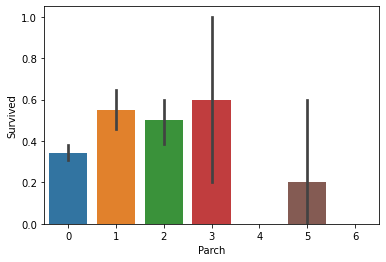

In [43]:
sns.barplot('Parch','Survived',data=df_train)
plt.show()

In [44]:
print('max fare:',df_train.Fare.max())
print('min fare:',df_train.Fare.min())
print('mean fare:',df_train.Fare.mean())

max fare: 512.3292
min fare: 0.0
mean fare: 32.2042079685746


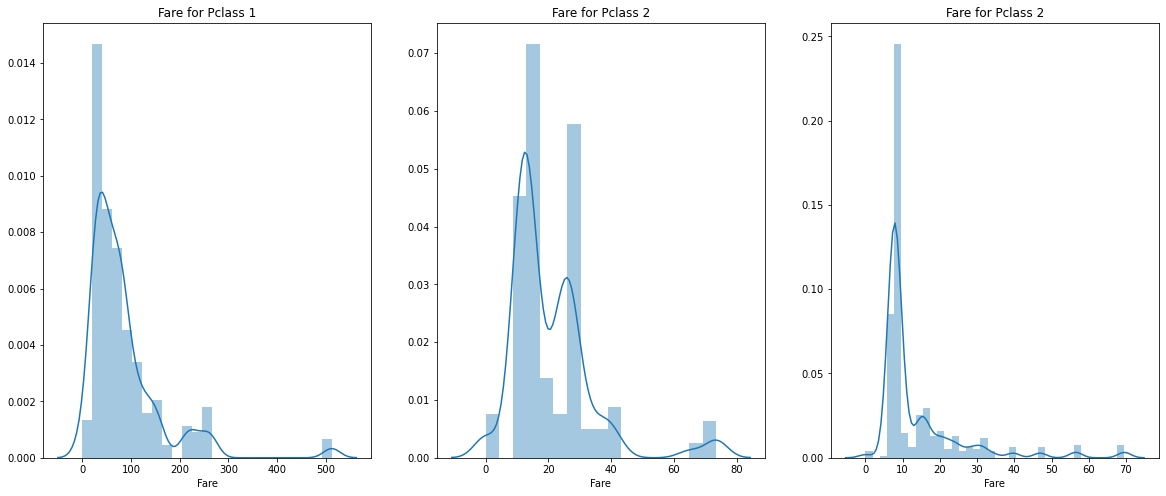

In [45]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare for Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fare for Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fare for Pclass 2')
plt.show();

In [46]:
#Hypothesis Testing
df_train1 = df_train.copy()

In [47]:
table = pd.crosstab(df_train['Survived'],df_train['Sex'])
print(table)

Sex       female  male
Survived              
0             81   468
1            233   109


In [48]:
table = pd.crosstab([df_train['Survived']], df_train['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,260.7170
P-Value,0.0000


In [49]:
#Hypothesis 2
fare_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_train['fare_group'] = pd.cut(df_train.Fare, [0,10,20,30,40,50,60,70,80,90,100,600], right=False, labels=fare_labels)
print(df_train.groupby(['fare_group']).Survived.mean())

fare_group
0-9      0.199405
10-19    0.424581
20-29    0.426471
30-39    0.437500
40-49    0.266667
50-59    0.692308
60-69    0.352941
70-79    0.586207
80-89    0.866667
90-99    0.875000
100+     0.735849
Name: Survived, dtype: float64


Text(0.5, 0, 'Fare range')

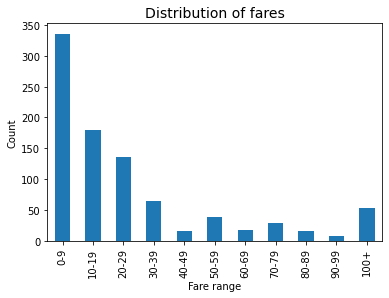

In [50]:
df_train.groupby(['fare_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of fares",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Fare range')

In [51]:
table = pd.crosstab([df_train['Survived']], df_train['fare_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,123.7715
P-Value,0.0000


In [52]:
#Hypothesis 3
table = pd.crosstab(df_train['Survived'],df_train['Pclass'])
print(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [53]:
table = pd.crosstab([df_train['Survived']], df_train['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,102.8890
P-Value,0.0000


In [54]:
#Hypothesis 4
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_train['age_group'] = pd.cut(df_train.Age, range(0, 81, 10), right=False, labels=age_labels)
print(df_train.groupby(['age_group']).Survived.mean())

age_group
0-9      0.606061
10-19    0.401961
20-29    0.386719
30-39    0.332237
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


Text(0.5, 0, 'Age Group')

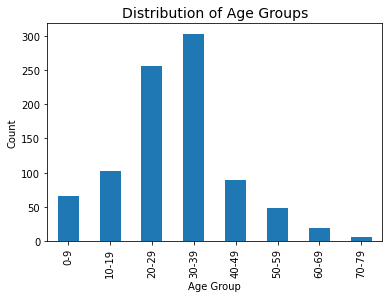

In [55]:
df_train.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group')

In [56]:
table = pd.crosstab([df_train['Survived']], df_train['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,21.6967
P-Value,0.0029
